First, we import the necessary libraries

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
from messy2 import *

We generate samples of a bi-modal distribution as the target density that we would like to infer it from its samples.

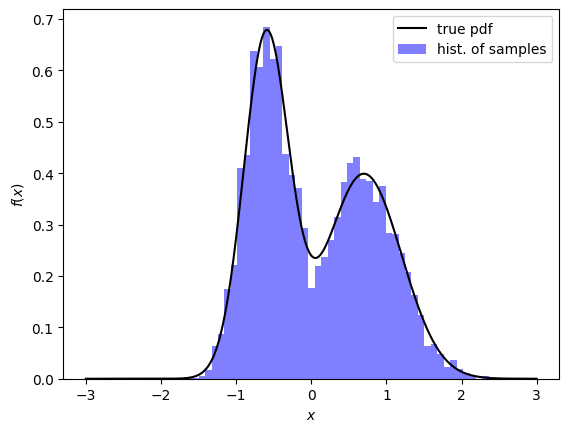

In [4]:
def Gaussian(x,mu,sig):
  return 1.0/(sig*np.sqrt(2.0*np.pi)) * np.exp(-0.5*(x-mu)**2/sig**2)

def bi_mod(x,mu1,mu2,sig1,sig2):
  return 0.5*( Gaussian(x,mu1,sig1) + Gaussian(x,mu2,sig2) )

n_samples = 5000
mu1 = -0.6; mu2=0.7; sig1=0.3; sig2 = 0.5
X = np.concatenate([np.random.normal(mu1,sig1,int(n_samples/2)), np.random.normal(mu2,sig2,n_samples-int(n_samples/2))])
true_pdf = lambda x: bi_mod(x,mu1,mu2,sig1,sig2)

xx = np.linspace(-3, 3, 1000) # for plotting
fig, ax = plt.subplots()
ax.plot(xx, true_pdf(xx), color="black", label = "true pdf")
_ = ax.hist(X, color="blue", label = "hist. of samples", density=True, bins=50, alpha=0.5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.legend()
plt.show()

In [3]:
## MESSY
constant_range=(1,3)
def cos_(x):
  integer = random.randint(*constant_range)
  half = integer + random.choice([0, 0.5])
  return sp.cos(sp.Rational(half)*x)
def sin_(x):
  integer = random.randint(*constant_range)
  half = integer + random.choice([0, 0.5])
  return sp.cos(sp.Rational(half)*x)

highest_order = 2 # highest order term
tree_depth = 2 # depth of the tree expression
poly_order = highest_order # order of polynomial in MESSY-P
x = sp.symbols('x', real=True)
pow = [sp.lambdify(x, x**i, "numpy") for i in range(1, highest_order+1)] # Poly. basis functions
binary_operators = [sp.Mul]
unary_functions = [sp.cos, sp.sin] + pow
n_rounds = 10 # number of iterations for the outmost search loop
nm_xe = highest_order # highest order term of the constructed basis
nb_l, nb_u = 2, 6
dic, best_iter = get_pdf(X, Binary_operators=binary_operators, Unary_functions=unary_functions, Tree_depth=tree_depth, N_iters=n_rounds, Poly_order=poly_order, Nm_xe=nm_xe, Nb_l=nb_l, Nb_u=nb_u, N_levels=2, threshold_sample=0.1, verbose = True, piecewise=False)
messy_s_pdf = dic[best_iter][0]

Round: 0  out of  10
Level: 0
generate a basis
cond(L) 1.0000000000000042  after orthogonalization
found a good basis
exp(-0.914988830114137*x**2 + 0.0732723247817526*x)
Level: 1
generate a basis
cond(L) 1.0000000000000007  after orthogonalization
found a good basis
exp(-0.747934862173108*x**2 - 0.141395267910279*x)
SDE done, Starting MxED
MxED done
Done with Round: 1  out of  10 

Round: 1  out of  10
Level: 0


NameError: name 'unary_functions' is not defined

In [5]:
highest_order = 2
x = sp.symbols('x', real=True)
pow = [sp.lambdify(x, x**i, "numpy") for i in range(1, highest_order+1)] # Poly. basis functions

binary_operators = [sp.Mul]
unary_functions = [sp.cos, sp.sin] + pow

messy = StatisticalModel(highest_order=highest_order, nb_l=2, nb_u=4, poly_order=4, tree_depth=2, binary_operators=binary_operators, unary_functions=unary_functions)

dic, best_iter = messy.get_pdf(X)

Round: 0  out of  5 

Level: 0 

generate a basis
cond(L) 1.0000000000000022  after orthogonalization
found a good basis
exp(-0.606096961719088*x**4 + 0.929648132787176*x**3 + 0.173083127844466*x**2 - 1.09582437086606*x)
Level: 1 

generate a basis
cond(L) 1.000000000000024  after orthogonalization
found a good basis
exp(0.404979181901851*x**4 - 1.39796185644462*x**3 - 1.57715130055502*x**2 + 3.96460174418578*x)
SDE done, Starting MxED
MxED done
Round: 1  out of  5 

Level: 0 

cond(L) 23.677953156653025
generate a basis
cond(L) 1.000000000000006  after orthogonalization
found a good basis
exp(-0.0141923731531547*x**4*sin(x**2) - 0.908148459742574*x**2 - 0.101423210019284*cos(x**4))
Level: 1 

cond(L) 123.8899589090933
generate a basis
cond(L) 1.0000000000000033  after orthogonalization
found a good basis
exp(-0.272246530020468*x**2*cos(x**2) + 1.59153756802468*sin(x**2)*cos(x**2) + 1.37497339195673*sin(x**2) + 2.77500154452112*cos(x))
SDE done, Starting MxED
MxED done
Round: 2  out of

KeyboardInterrupt: 